# Graph Fitting

In [8]:
import graph
import som as SOM
import gng as GNG
import reeb as Reeb
from matplotlib import pyplot as plt
import networkx as nx
from sklearn import datasets


def to_nx_graph(graph):
    export = nx.Graph()
    added_nodes = []
    for node in graph.nodes.flatten():
        export.add_node(node, pos=node.coordinates)
        added_nodes.append(node)
    for edge in graph.get_edges():
        export.add_edge(added_nodes[edge[0]], added_nodes[edge[1]])
    return export

### Usage
The implementation for the Self-Organising-Maps can take any Graph as input. Users can define graphs themselves, or
generate square grids using the built-in methods (example below). In a square grid graph a node is
connected to its direct dimensional neighbours.

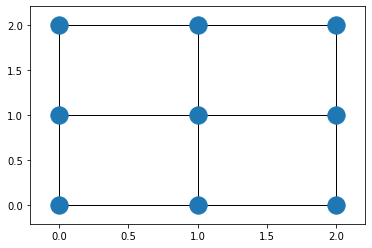

In [18]:
grid3x3 = graph.create_grid((3, 3))
nx_graph = to_nx_graph(grid3x3)

fig, ax = plt.subplots()
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()
plt.close(fig)

In [3]:
# Create a 4 dimensional square-grid graph of shape (10,8,7,5)
square_grid = graph.create_grid((10,8,7,5))
print(f"The nodes of the graph have shape {square_grid.nodes.shape}, "
      f"with a total of {len(square_grid.nodes.flatten())} nodes")

print(f"\nThe neighbours of node at coordinates (1,1,1,1) are:")
for node in square_grid.nodes[(1,1,1,1)].neighbours:
    print(f"    Node at position - {node.coordinates}")

The nodes of the graph have shape (10, 8, 7, 5), with a total of 2800 nodes

The neighbours of node at coordinates (1,1,1,1) are:
    Node at position - (0.0, 1.0, 1.0, 1.0)
    Node at position - (1.0, 0.0, 1.0, 1.0)
    Node at position - (1.0, 1.0, 0.0, 1.0)
    Node at position - (1.0, 1.0, 1.0, 0.0)
    Node at position - (2.0, 1.0, 1.0, 1.0)
    Node at position - (1.0, 2.0, 1.0, 1.0)
    Node at position - (1.0, 1.0, 2.0, 1.0)
    Node at position - (1.0, 1.0, 1.0, 2.0)


Note that the coordinates of nodes correspond to their location in the grid, with a step size of 1. If a different step
size is desired this can be changed in the ```create_grid()``` function using the ```coord_scale``` parameter (default
is 1).

**Important**: The ```coord_scale``` needs to be set at a positive or negative value which is not 0.

Different graphs can be created by the user for the SOM algorithm. below is an example of a graph consisting of 2
unconnected lines:

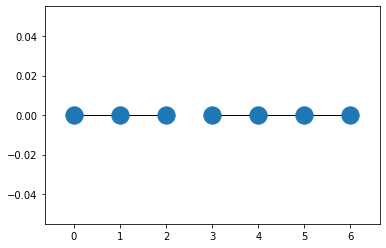

In [20]:
# In order to plot the graphs using networkX the coordinates need to be 2 dimensional
def make_lines() :
    g = graph.Graph(7, dimensions=2)

    g.nodes[1].connect(g.nodes[0])
    g.nodes[1].connect(g.nodes[2])
    g.nodes[4].connect(g.nodes[3])
    g.nodes[4].connect(g.nodes[5])
    g.nodes[5].connect(g.nodes[6])

    return g

lines = make_lines()

nx_graph = to_nx_graph(lines)
fig, ax = plt.subplots()
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()
plt.close(fig)

## Self Organising Maps
We can now apply the SOM algorithm over the graph with a generated dataset.

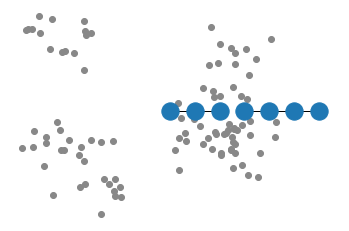

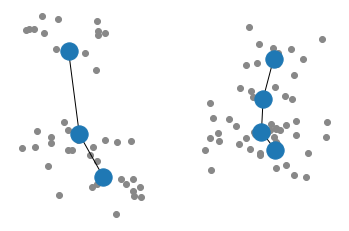

In [21]:
lines = make_lines()
nx_graph = to_nx_graph(lines)
x, y = datasets.make_blobs(random_state=47, center_box=(-5,5), centers=7)
plt.scatter(x[:, 0], x[:, 1], c=['#888888'])
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
plt.show()
plt.close()


som = SOM.SOM(lines)
som.fit(x, iterations=20)

nx_graph = to_nx_graph(lines)
plt.scatter(x[:, 0], x[:, 1], c=['#888888'])
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
plt.show()
plt.close()

# Growing Neural Gas

Below is an example usage of the GNG algorithm with a generated dataset.

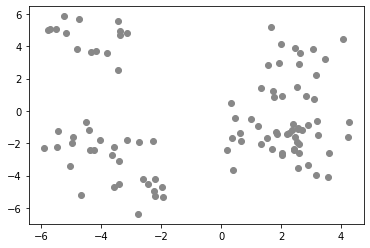

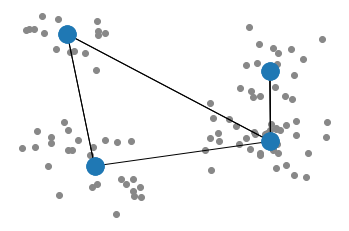

In [22]:
x, _ = datasets.make_blobs(random_state=47, center_box=(-5,5), centers=7)
plt.scatter(x[:, 0], x[:, 1], c=['#888888'])
plt.show()
plt.close()

gng = GNG.GNG(x)
graph = gng.train(100, learning_rate=0.1, age_threshold=3, node_creation_interval=1750, new_node_error_discount=.5,
          step_error_discount=.2)

plt.scatter(x[:, 0], x[:, 1], c=['#888888'])
nx_graph = to_nx_graph(graph)
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
plt.show()
plt.close()

# Reeb graphs

Below is an example of the reeb graph usage. For this example we use the make_circles graph, with a max_k of 2, this is an easy way to create a visually intuitive result.

Note that the algorithm tries to make the graph visually pleasant by giving coordinates to nodes, these do not carry any meaning besides an attempt to make it easier to look at.

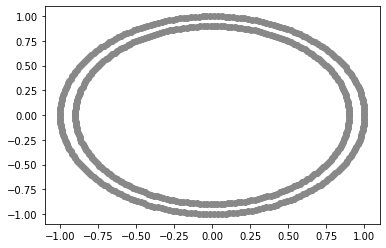

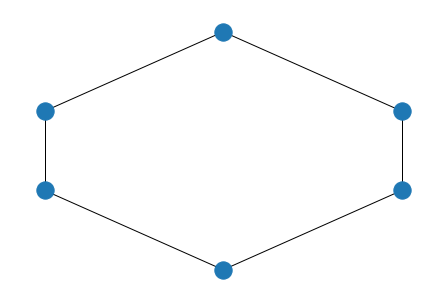

In [31]:
x, _ = datasets.make_circles(n_samples=500 ,random_state=47, factor=.9)
plt.scatter(x[:, 0], x[:, 1], c=['#888888'])
plt.show()
plt.close()

reeb = Reeb.Reeb()
reeb_graph = reeb.map(x, intervals=4, overlap=0.2, max_k=2)

nx_graph = to_nx_graph(reeb_graph)
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
plt.show()
plt.close()